<a href="https://colab.research.google.com/github/drm1072/Workload-DRM/blob/main/Skewness_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In a histogram to visualize a set of values, data can be considered "skewed" meaning it can have a long tail on a side.

This article will cover common interpretations of skewness.

In [1]:
import seaborn as sns  #a library for making statistical graphics in Python
import numpy as np #Numpy provides fast mathematical function processing
import scipy.stats as stats #High level library for stats and mathematics
import random #generate psuedo random numbers in python
import warnings #Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

Visualization styling code

In [3]:
sns.set(rc={'figure.figsize':(10.5, 7.5)})
sns.set_context('talk')

**No Skew**

Generate a Normal Distribution

Using the numpy package's random module, we can call the normal() method to create a list of values with a normal distribution by setting the following arguments:

**loc** as the mean of the distribution
**scale** as the standard deviation of the distribution
**size** as number of samples

In [4]:
np.random.seed(4) # seed random number generator with fixed value so we always get same values below
normal_distr_values = list(np.random.normal(loc=100, scale=20, size=1300))

**View Distribution of normal_distr_values**

Below is a plot of a histogram of these values that resemble a normal distribution.

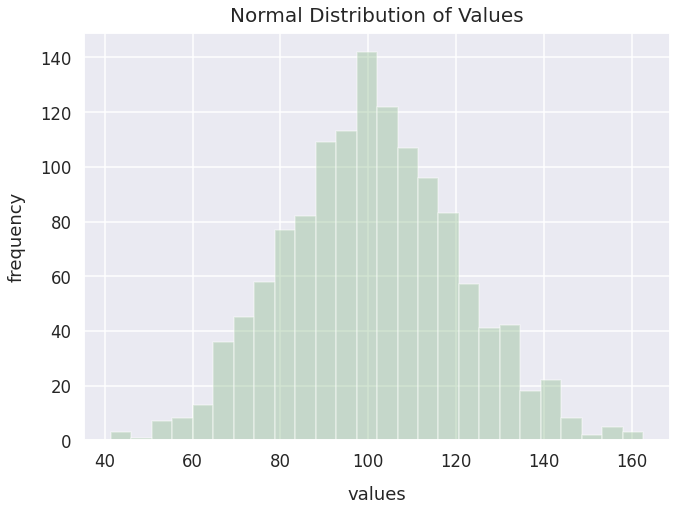

In [5]:
sns.distplot(normal_distr_values, kde=False, color='darkseagreen')
plt.title("Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("frequency", labelpad=15);

This distribution has no skew because it's perfectly symmetrical. With this distribution of no skew, the mean and median are typically at the peak. Let's calculate those and visualize them.

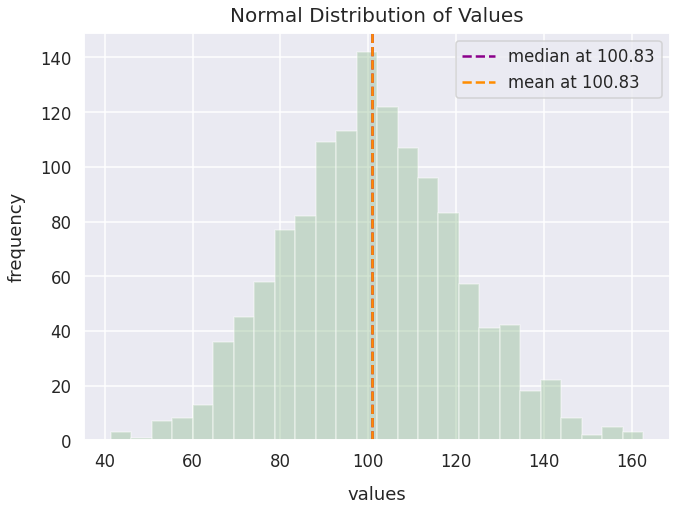

In [6]:
mean_normal_distr_values = round(np.mean(normal_distr_values), 2)
median_normal_distr_values = round(np.median(normal_distr_values), 2)
ax = sns.distplot(normal_distr_values, kde=False, color='darkseagreen')
plt.title("Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("frequency", labelpad=15);
names = ["median", "mean"]
colors = ['darkmagenta', 'darkorange']
measurements = [median_normal_distr_values, mean_normal_distr_values]
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

**Positive Skew**

**Get Diamonds Dataset**

Import diamonds dataset from Seaborn library and assign to DataFrame df_diamonds.

Each row of df_diamonds contains details about a specific diamond purchased. We'll just utilize the price column in our analysis below.

In [7]:
df_diamonds = sns.load_dataset('diamonds')

In [8]:
df_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**View Distribution of Diamond Prices**

Below is a histogram of the price field in df_diamonds.

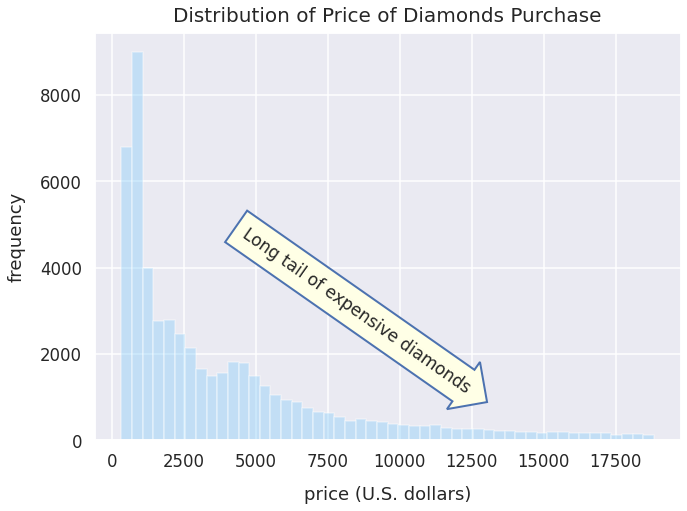

In [10]:
ax = sns.distplot(df_diamonds['price'], kde=False, color='lightskyblue')
plt.title("Distribution of Price of Diamonds Purchase", fontsize=20, y=1.012)
plt.xlabel("price (U.S. dollars)", labelpad=15)
plt.ylabel("frequency", labelpad=15)
bbox_props = dict(fc=(1, 1, 0.9), ec="b", lw=2)
t = ax.text(8500, 3000, "Long tail of expensive diamonds", ha="center", va="center", 
            rotation=325, size=17, bbox=bbox_props)
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

Most people tend to buy diamonds that are just a few hundred or few thousand dollars. Yet, it seems a small group of people are willing to pay over 10,000.

This distribution has positive skew because there's a long tail of values on the positive side of the peak. You would otherwise say this data is "skewed to the right".

In distributions in which there's positive skew, it's important to understand where the mean and median lie. Let's plot this distribution again and mark the mean and median values.

Calculate the median and mean value of horsepower_numerical_values using numpy methods.

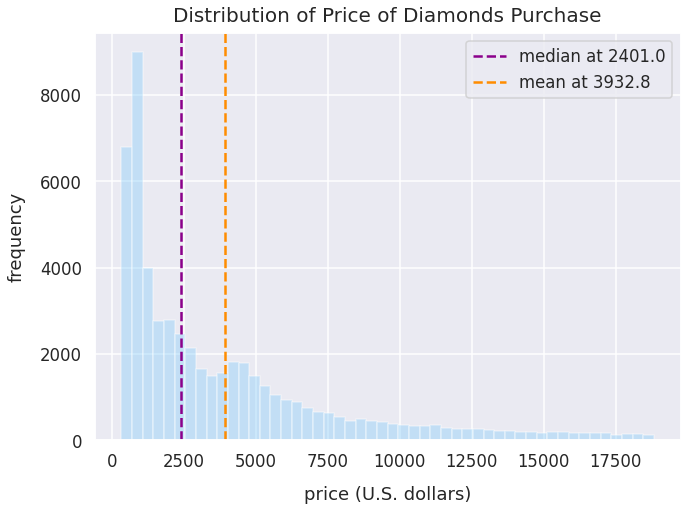

In [11]:
median_price = round(df_diamonds['price'].median(), 2)
mean_price = round(df_diamonds['price'].mean(), 2)
ax = sns.distplot(df_diamonds['price'], kde=False, color='lightskyblue')
plt.title("Distribution of Price of Diamonds Purchase", fontsize=20, y=1.012)
plt.xlabel("price (U.S. dollars)", labelpad=15)
plt.ylabel("frequency", labelpad=15)
names = ["median", "mean"]
colors = ['darkmagenta', 'darkorange']
measurements = [median_price, mean_price]
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

Nearly with all histograms that are positively skewed, the mean is greater than the median. The reason for this is that the long tail of values skews the mean higher than with a more normal distribution. Yet, the median isn't skewed by large values because it's just the "middle" of a list of sorted numbers.

**Negative Skew**

**Generate Fictional Meal Data**

Using the scipy package's stats module, we can call the beta() method to create a list of values with a negatively skewed distribtion.

The data below ressembles the prices of meals for a fast casual restaurant.

In [12]:
typical_meal_value_dollars = list(stats.beta.rvs(10, 2, loc=-8, scale=23, size=35000))

In [13]:
large_meal_value_dollars = [random.randrange(15, 23) for value in range(0, 200)]

In [14]:
meal_values_dollars = typical_meal_value_dollars + large_meal_value_dollars

View Distribution of Meal Orders [$]

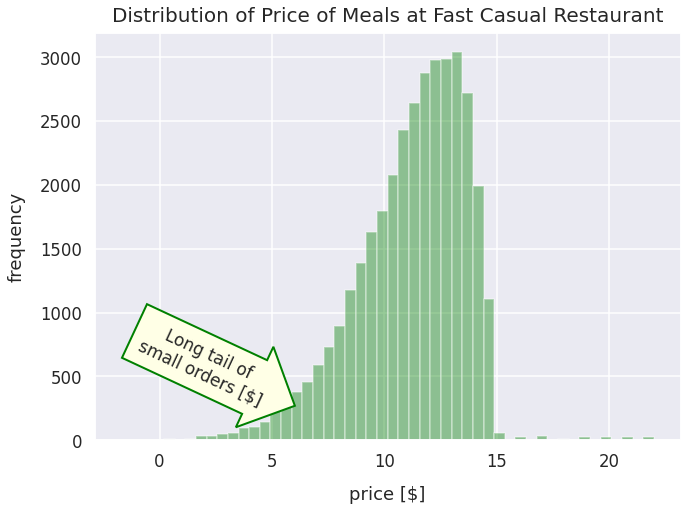

In [15]:
ax = sns.distplot(meal_values_dollars, kde=False, color='green')
plt.title("Distribution of Price of Meals at Fast Casual Restaurant", fontsize=20, y=1.012)
plt.xlabel("price [$]", labelpad=15)
plt.ylabel("frequency", labelpad=15)
bbox_props = dict(fc=(1, 1, 0.9), ec="green", lw=2)
t = ax.text(2, 600, "Long tail of\nsmall orders [$]", ha="center", va="center", 
            rotation=335, size=17, bbox=bbox_props)
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

Most people tend to spend around 10 to 14 dollars on their order. Very few people spend greater than 15. Lots of people spend between 0 and 8 and likely buy small items like appetizers or just drinks.

This distribution has negative skew because there's a long tail of values on the negative side of the peak. You would otherwise say this data is "skewed to the left".

In distributions in which there's negative skew, it's important to understand where the mean and median lie. Let's plot this distribution again and mark the mean and median values.

Calculate the median and mean value of meal_values_dollars using numpy methods.

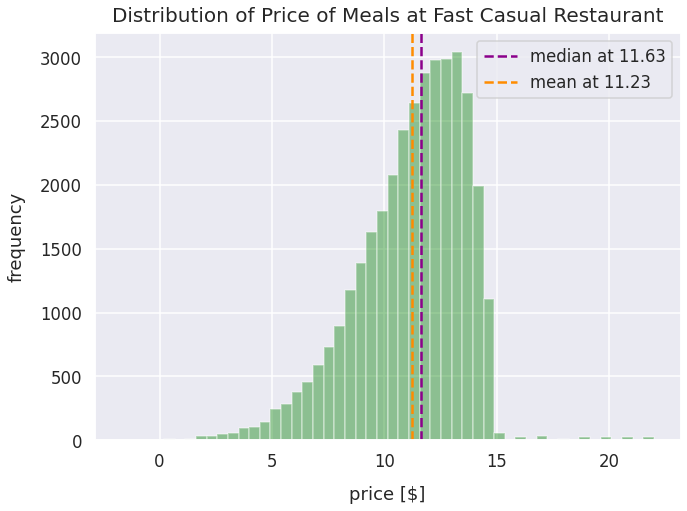

In [16]:
median_meal_price = round(np.median(meal_values_dollars), 2)
mean_meal_price = round(np.mean(meal_values_dollars), 2)
ax = sns.distplot(meal_values_dollars, kde=False, color='green')
plt.title("Distribution of Price of Meals at Fast Casual Restaurant", fontsize=20, y=1.012)
plt.xlabel("price [$]", labelpad=15)
plt.ylabel("frequency", labelpad=15)
names = ["median", "mean"]
colors = ['darkmagenta', 'darkorange']
measurements = [median_meal_price, mean_meal_price]
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

Nearly with all histograms that are negatively skewed, the mean is less than the median. The reason for this is that the long tail of values skews the mean lower than with a more normal distribution. Yet, the median isn't skewed by lots of small values because it's just the "middle" of a list of sorted numbers.